In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [11]:
# chuyển đổi kiểu dữ liệu
df = pd.read_csv("merged_data.csv")
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
XSTC         object
dtype: object

Text(0.5, 1.0, 'Biểu đồ so sánh giá đóng cửa của các ngân hàng từ 2020-01-01 đến 2024-05-20')

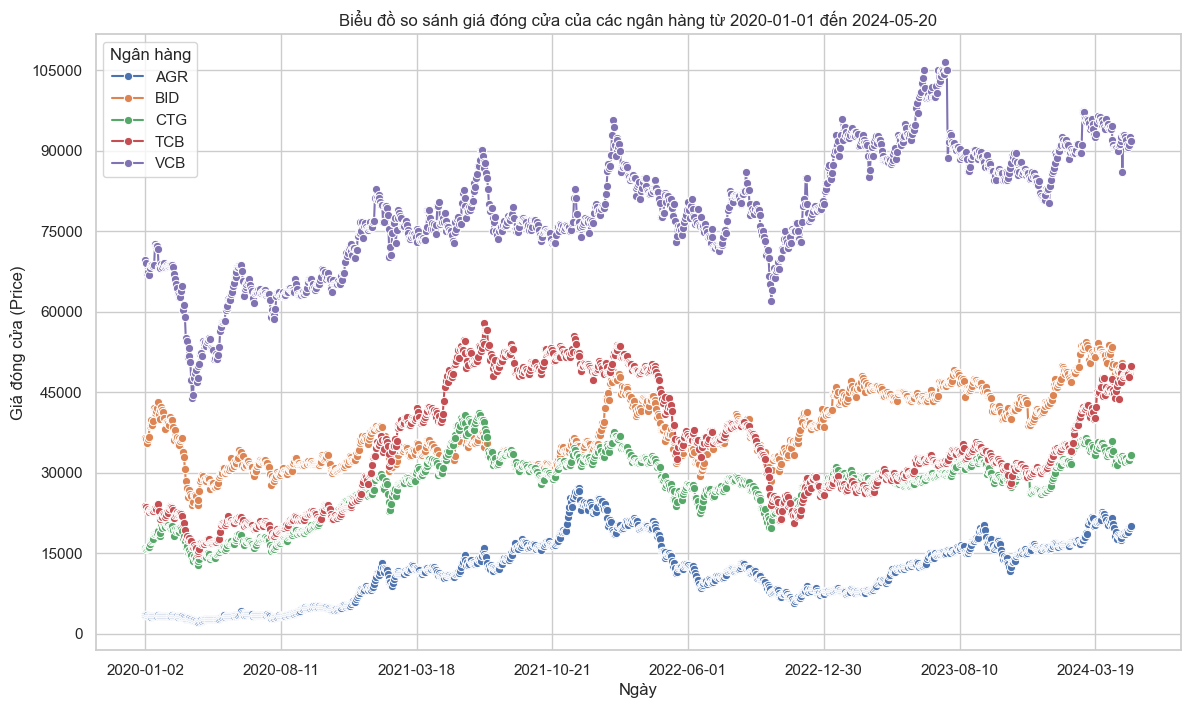

In [31]:
# Đặt khoảng thời gian từ ngày 2023-01-01 đến 2023-12-31
start_date = '2020-01-01'
end_date = '2024-05-20'

# Lọc dữ liệu theo khoảng thời gian
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
filtered_df = df[mask]

# Thiết lập phong cách cho biểu đồ
sns.set(style='whitegrid')

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ biểu đồ giá đóng cửa (Price)
sns.lineplot(data=filtered_df, x='Date', y='Price', hue='XSTC', ax=ax1, marker='o')
ax1.set_ylabel('Giá đóng cửa (Price)')
ax1.set_xlabel('Ngày')
ax1.legend(title='Ngân hàng', loc='upper left')

# Giảm số lượng ticks trên trục x để dễ nhìn hơn
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
ax1.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.title('Biểu đồ so sánh giá đóng cửa của các ngân hàng từ '+start_date +' đến '+end_date)

Text(0.5, 1.0, 'Biểu đồ so sánh số lượng giao dịch của các ngân hàng từ 2024-01-01 đến 2024-05-20')

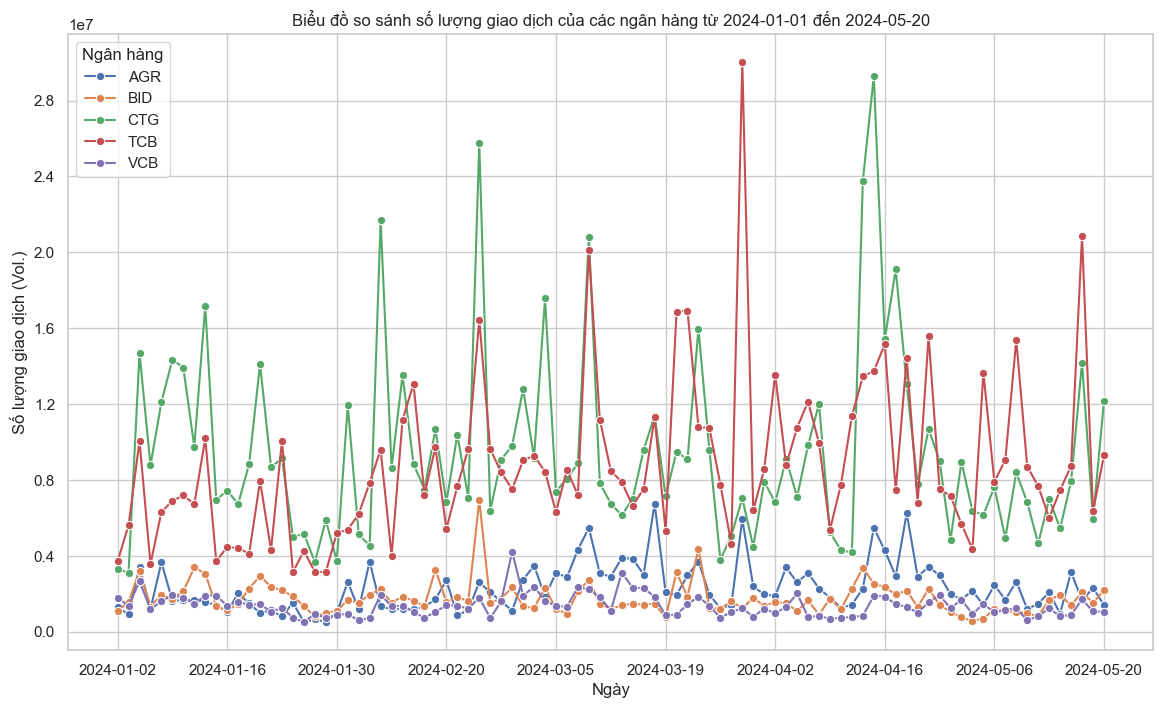

In [13]:

# Lọc dữ liệu theo khoảng thời gian
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
filtered_df = df[mask]

# Thiết lập phong cách cho biểu đồ
sns.set(style='whitegrid')

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ biểu đồ giá đóng cửa (Price)
sns.lineplot(data=filtered_df, x='Date', y='Vol.', hue='XSTC', ax=ax1, marker='o')
ax1.set_ylabel('Số lượng giao dịch (Vol.)')
ax1.set_xlabel('Ngày')
ax1.legend(title='Ngân hàng', loc='upper left')

# Giảm số lượng ticks trên trục x để dễ nhìn hơn
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
ax1.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.title('Biểu đồ so sánh số lượng giao dịch của các ngân hàng từ '+start_date +' đến '+end_date)


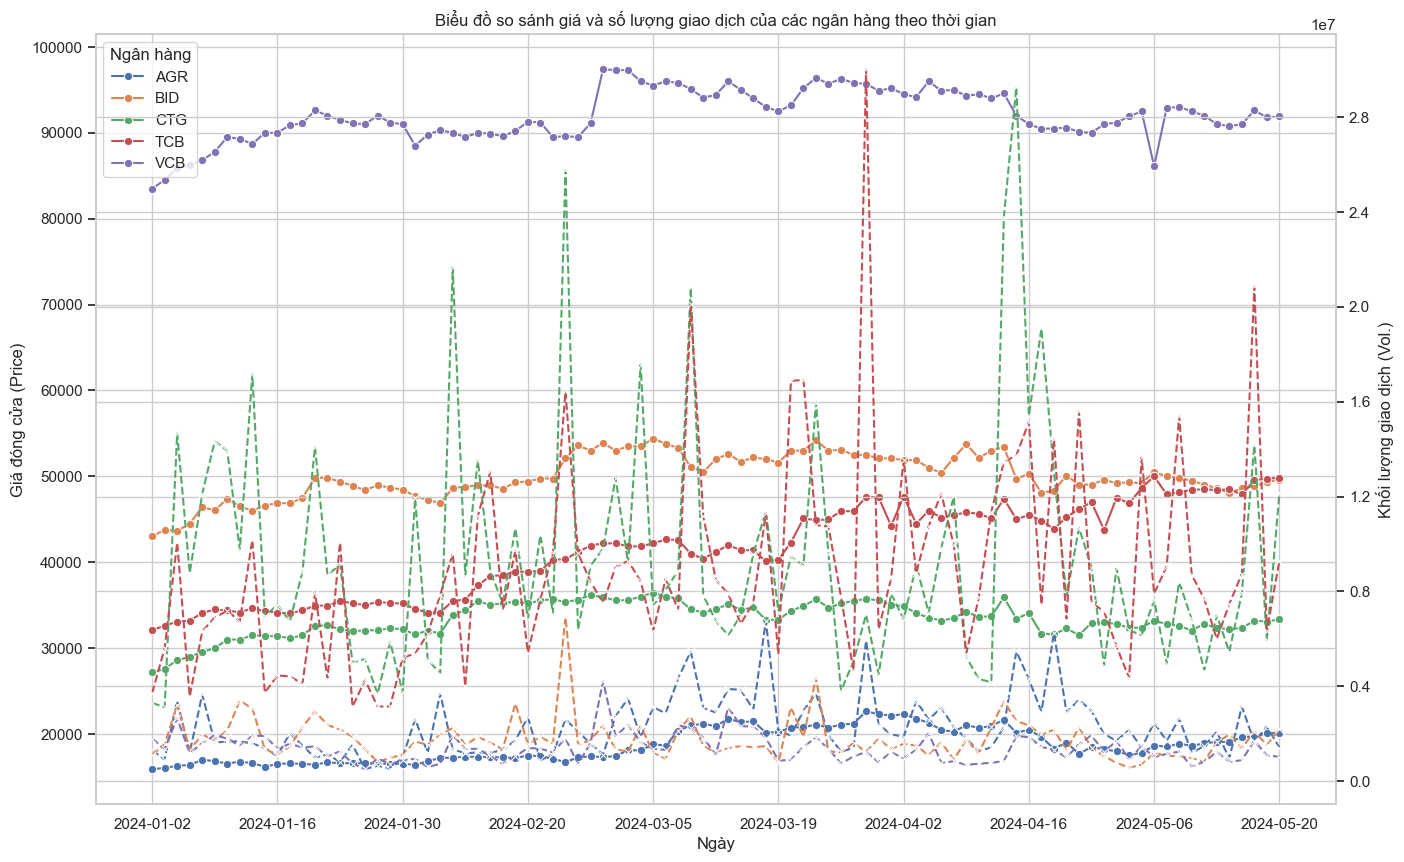

In [14]:
# Lọc dữ liệu theo khoảng thời gian
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
filtered_df = df[mask]

# Thiết lập phong cách cho biểu đồ
sns.set(style='whitegrid')

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(16, 10))

# Vẽ biểu đồ giá đóng cửa (Price)
sns.lineplot(data=filtered_df, x='Date', y='Price', hue='XSTC', ax=ax1, marker='o')
ax1.set_ylabel('Giá đóng cửa (Price)')
ax1.set_xlabel('Ngày')
ax1.legend(title='Ngân hàng', loc='upper left')

# Giảm số lượng ticks trên trục x để dễ nhìn hơn
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
ax1.yaxis.set_major_locator(plt.MaxNLocator(10))

# Tạo trục y phụ cho khối lượng giao dịch (Vol.)
ax2 = ax1.twinx()
sns.lineplot(data=filtered_df, x='Date', y='Vol.', hue='XSTC', ax=ax2, linestyle='--', marker='x', legend=False)
ax2.set_ylabel('Khối lượng giao dịch (Vol.)')

ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
ax2.yaxis.set_major_locator(plt.MaxNLocator(10))

# Thiết lập tiêu đề
plt.title('Biểu đồ so sánh giá và số lượng giao dịch của các ngân hàng theo thời gian')

# Hiển thị biểu đồ
plt.show()

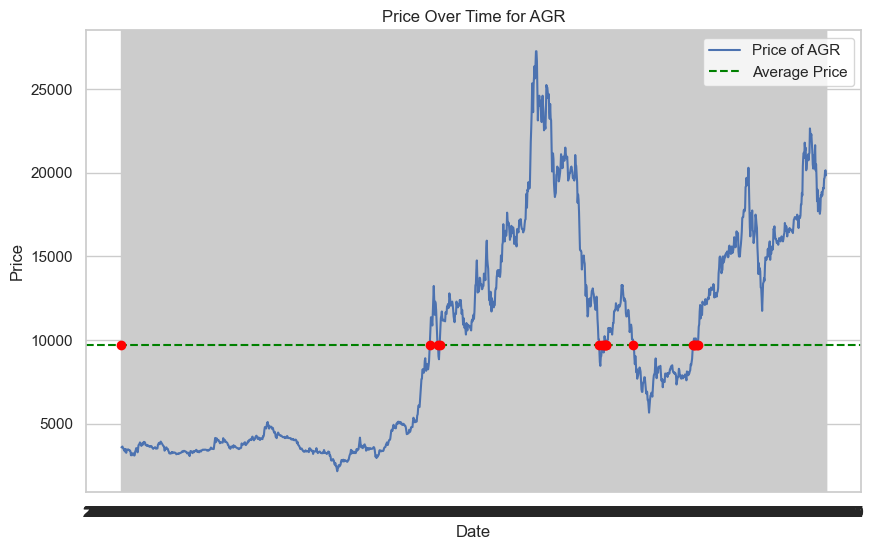

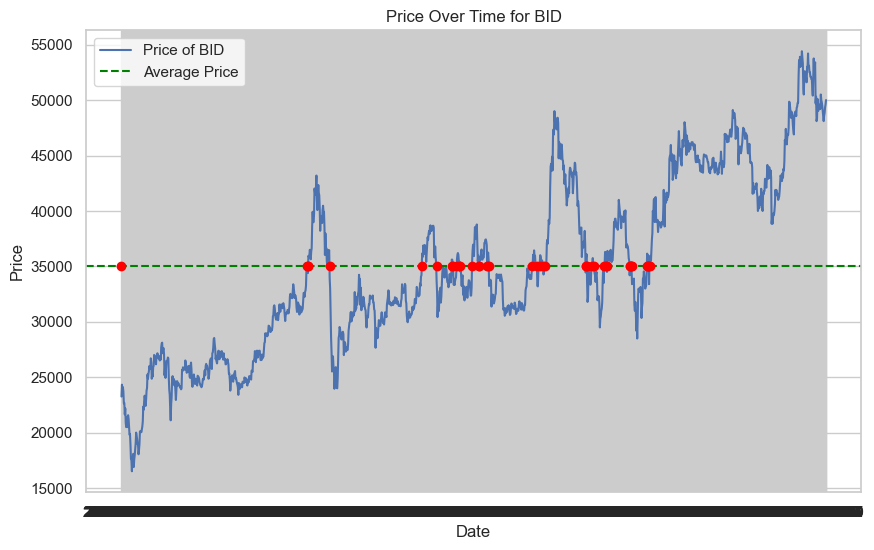

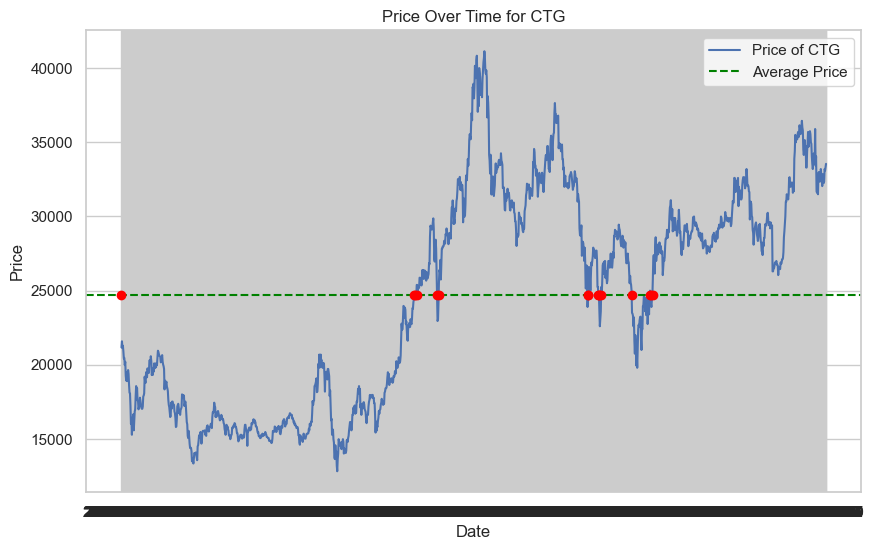

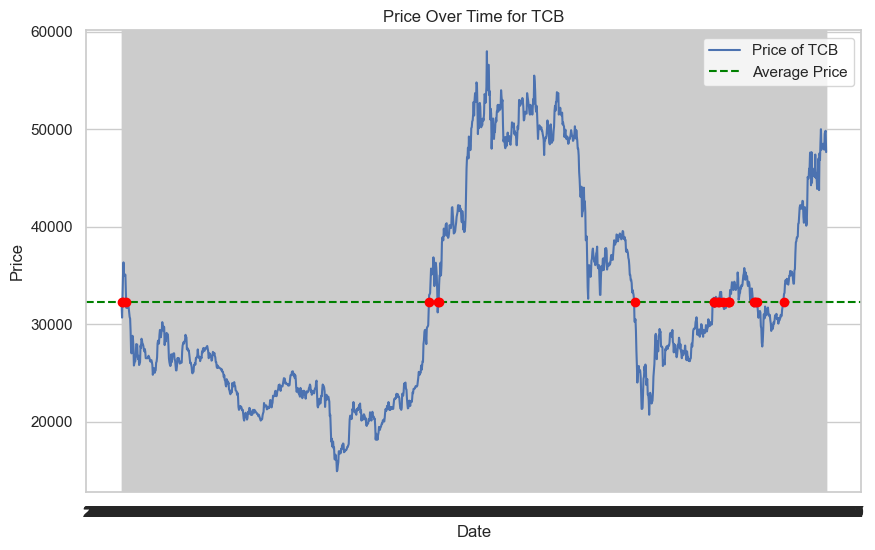

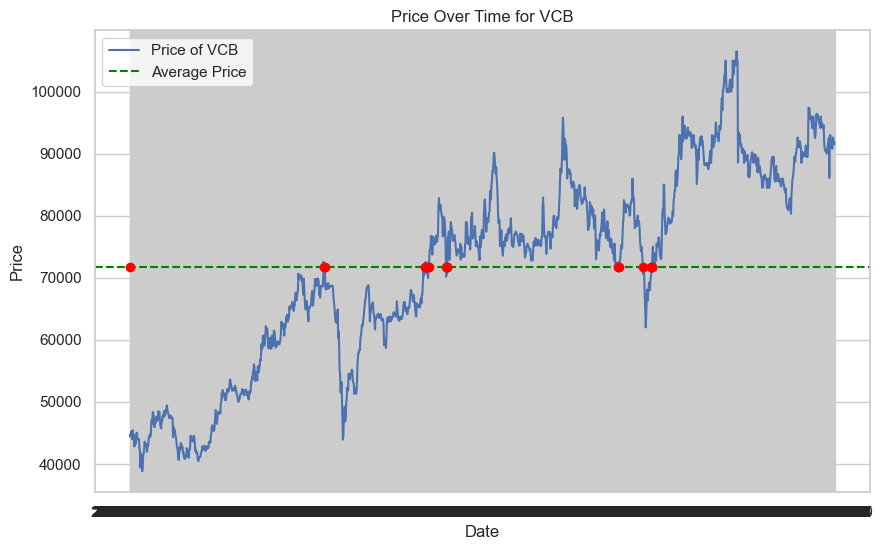

[[694, 796, Timedelta('118 days 11:12:00'), 16, 9726.88979865772, 'AGR'],
 [662, 828, Timedelta('41 days 16:00:00'), 40, 35034.14362416107, 'BID'],
 [816, 674, Timedelta('108 days 22:24:00'), 16, 24680.907651006717, 'CTG'],
 [603,
  887,
  Timedelta('107 days 06:18:56.842105264'),
  20,
  32244.759060402685,
  'TCB'],
 [844,
  646,
  Timedelta('94 days 15:31:45.882352941'),
  18,
  71676.12684563758,
  'VCB']]

In [15]:
banks = df['XSTC'].unique()
days_banks = []

# Plot separate line charts for each bank
for bank in banks:
    bank_data = df[df['XSTC'] == bank]
    average_price = bank_data['Price'].mean()
    days_above_average = (bank_data['Price'] > average_price).sum()
    days_below_average = (bank_data['Price'] < average_price).sum()
    # Tìm các điểm cắt giữa giá cổ phiếu và đường trung bình
    crossing_points = bank_data[(bank_data['Price'] > average_price) != (bank_data['Price'] > average_price).shift(1)]

    y_value = np.full((crossing_points.shape[0],), average_price)

    days_banks.append([days_above_average, days_below_average, (pd.to_datetime(crossing_points['Date'])).diff().mean(),crossing_points.shape[0], average_price, bank])
    plt.figure(figsize=(10, 6))
    plt.plot(bank_data['Date'], bank_data['Price'], label=f'Price of {bank}')
    plt.axhline(y=average_price, color='green', linestyle='--', label='Average Price')

    plt.scatter(crossing_points['Date'], y_value, color='red', zorder=5)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Over Time for {bank}')
    plt.legend()
    
    # Show the plot
    plt.show()
days_banks

C:\Users\Admin\AppData\Local\Temp\ipykernel_18460\945631283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['RSI'] = calculate_rsi(bank_data['Price'])


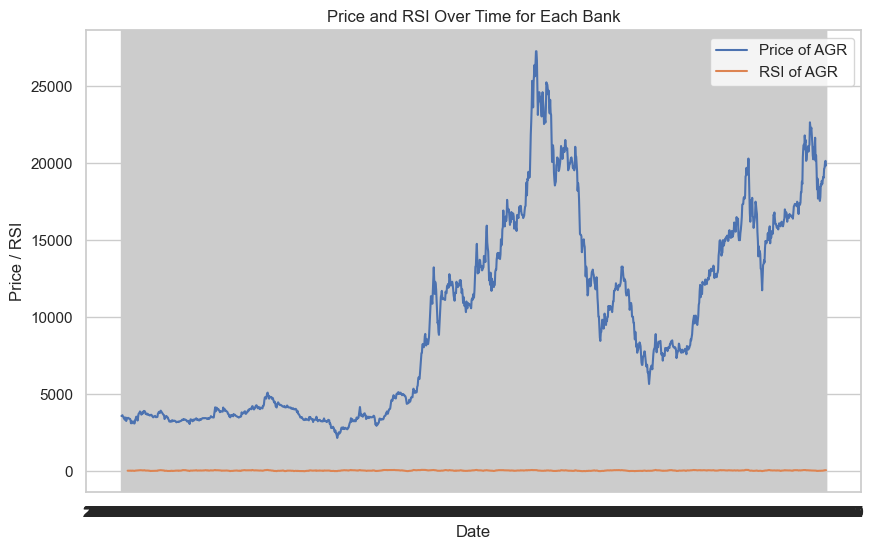

C:\Users\Admin\AppData\Local\Temp\ipykernel_18460\945631283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['RSI'] = calculate_rsi(bank_data['Price'])


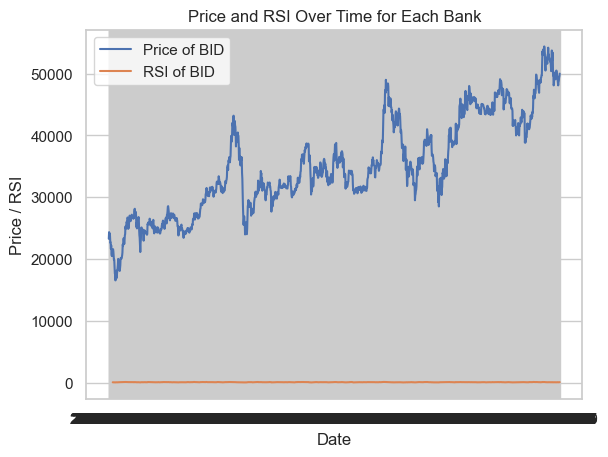

C:\Users\Admin\AppData\Local\Temp\ipykernel_18460\945631283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['RSI'] = calculate_rsi(bank_data['Price'])


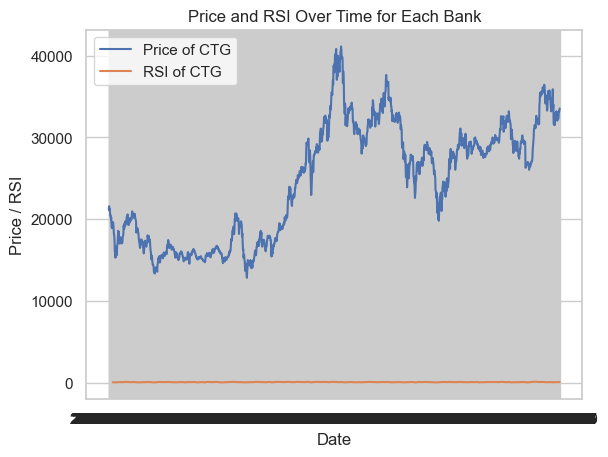

C:\Users\Admin\AppData\Local\Temp\ipykernel_18460\945631283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['RSI'] = calculate_rsi(bank_data['Price'])


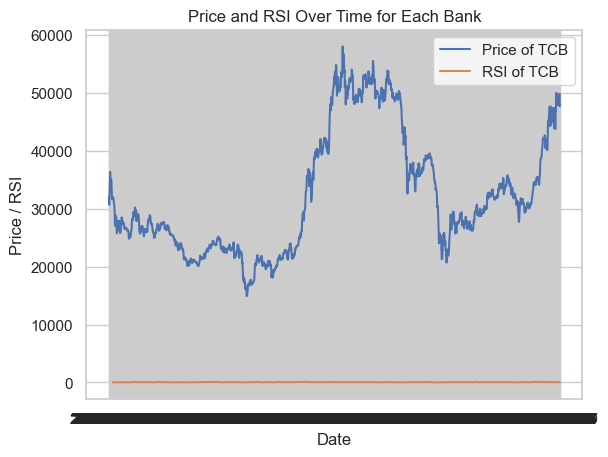

C:\Users\Admin\AppData\Local\Temp\ipykernel_18460\945631283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['RSI'] = calculate_rsi(bank_data['Price'])


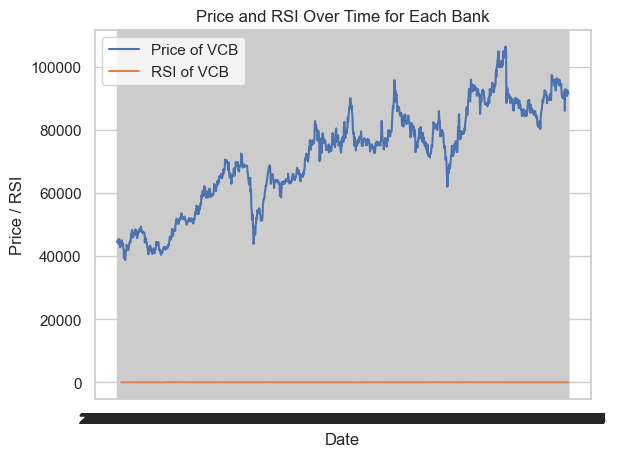

In [34]:
# Tính toán chỉ số RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Vẽ biểu đồ RSI cho từng ngân hàng
banks = df['XSTC'].unique()

plt.figure(figsize=(10, 6))

for bank in banks:
    bank_data = df[df['XSTC'] == bank]
    
    # Tính RSI cho ngân hàng hiện tại
    bank_data['RSI'] = calculate_rsi(bank_data['Price'])
    
    # Vẽ biểu đồ giá cổ phiếu
    plt.plot(bank_data['Date'], bank_data['Price'], label=f'Price of {bank}')
    
    # Vẽ biểu đồ RSI
    plt.plot(bank_data['Date'], bank_data['RSI'], label=f'RSI of {bank}')

    # Đặt tiêu đề và nhãn
    plt.title('Price and RSI Over Time for Each Bank')
    plt.xlabel('Date')
    plt.ylabel('Price / RSI')
    plt.legend()

    # Hiển thị biểu đồ
    plt.show()


## 1/ Trung bình bao lâu thì giá cổ phiếu các ngân hàng đạt giá trị trung bình?

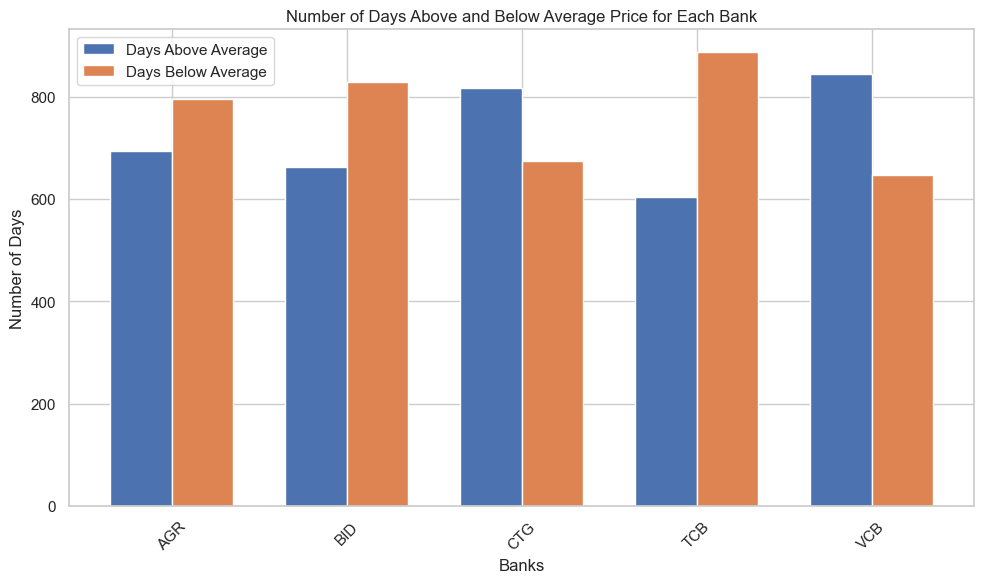

In [16]:
# Tạo danh sách chứa tên các ngân hàng
bank_names = [item[5] for item in days_banks]
# Tạo danh sách chứa các giá trị cần vẽ
days_above_average = [item[0] for item in days_banks]
days_below_average = [item[1] for item in days_banks]
mean_date_diff = [item[2] for item in days_banks]
crossing_points_count = [item[3] for item in days_banks]
average_price = [item[4] for item in days_banks]

# Số lượng ngân hàng
num_banks = len(bank_names)

# Độ rộng của mỗi cột
bar_width = 0.35

# Tạo các chỉ mục cho các cột
index = range(num_banks)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
# plt.bar(index, average_price, bar_width, label='verage_price')
plt.bar(index, days_above_average, bar_width, label='Days Above Average')
plt.bar([i + bar_width for i in index], days_below_average, bar_width, label='Days Below Average')

# Đặt nhãn và tiêu đề
plt.xlabel('Banks')
plt.ylabel('Number of Days')
plt.title('Number of Days Above and Below Average Price for Each Bank')
plt.xticks([i + bar_width / 2 for i in index], bank_names, rotation=45)
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


### Số lần tiệm cận giá trị trung bình

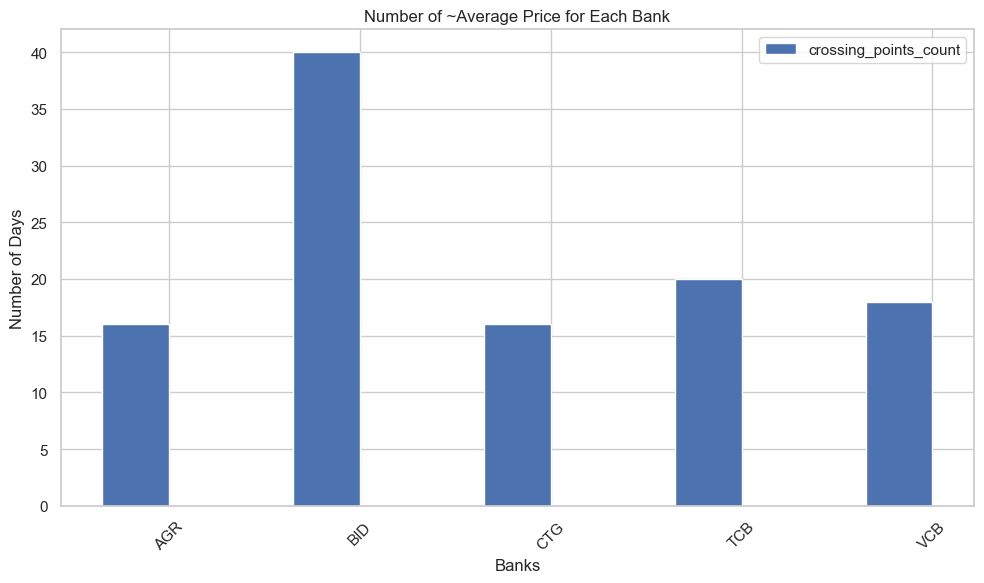

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(index, crossing_points_count, bar_width, label='crossing_points_count')

# Đặt nhãn và tiêu đề
plt.xlabel('Banks')
plt.ylabel('Number of Days')
plt.title('Number of ~Average Price for Each Bank')
plt.xticks([i + bar_width / 2 for i in index], bank_names, rotation=45)
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [18]:
mean_date_diff

[Timedelta('118 days 11:12:00'),
 Timedelta('41 days 16:00:00'),
 Timedelta('108 days 22:24:00'),
 Timedelta('107 days 06:18:56.842105264'),
 Timedelta('94 days 15:31:45.882352941')]

Biểu đồ kết hợp: đường: khoảng cách tb giữa các điểm, cột: số điểm cắt

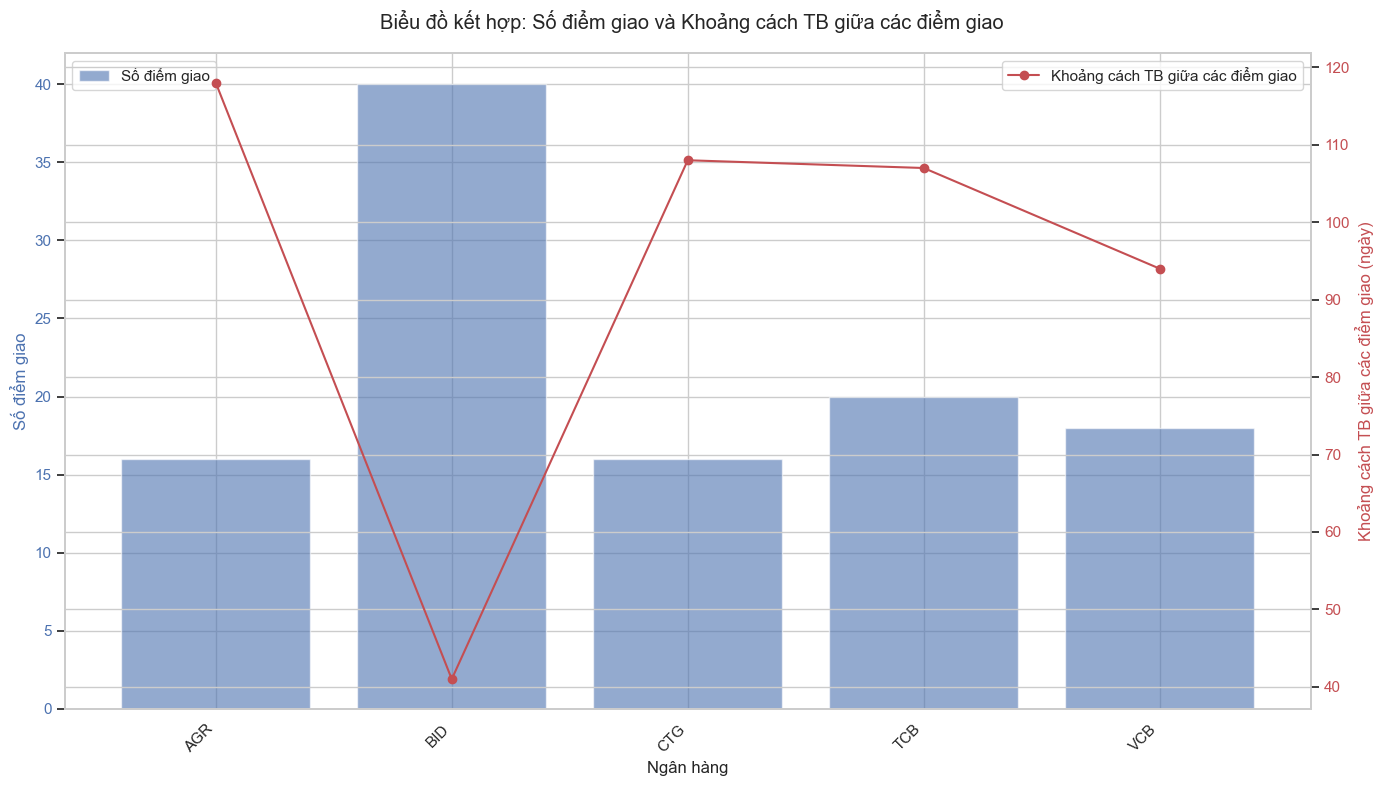

In [21]:
# Tạo danh sách chứa tên các ngân hàng
bank_names = [item[5] for item in days_banks]
for item in days_banks:
    if pd.isna(item[2]):
        item[2] = 0
    else:
        item[2] = item[2].days

# Tạo danh sách chứa các giá trị cần vẽ
mean_date_diff = [item[2] for item in days_banks]
crossing_points_count = [item[3] for item in days_banks]

# Thiết lập biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ biểu đồ cột cho số điểm giao
ax1.bar(bank_names, crossing_points_count, color='b', alpha=0.6, label='Số điểm giao')
ax1.set_xlabel('Ngân hàng')
ax1.set_ylabel('Số điểm giao', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Thiết lập trục x
ax1.set_xticks(range(len(bank_names)))
ax1.set_xticklabels(bank_names, rotation=45, ha='right')

# Tạo trục y thứ hai để vẽ biểu đồ đường cho khoảng cách trung bình giữa các điểm giao
ax2 = ax1.twinx()
ax2.plot(bank_names, mean_date_diff, color='r', marker='o', linestyle='-', label='Khoảng cách TB giữa các điểm giao')
ax2.set_ylabel('Khoảng cách TB giữa các điểm giao (ngày)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Thêm tiêu đề và legend
fig.suptitle('Biểu đồ kết hợp: Số điểm giao và Khoảng cách TB giữa các điểm giao')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


=> BIDV dao động thường xuyên nhất (số lần qua trục trung bình nhiều nhất, thời gian giữa các lần ngắn nhất). Cổ phiếu ít có dao động mạnh về giá.

=> Techcombank có số lần giao động xếp t2, nhưng thời gian giữa các lần dao động xa nhất nên là ngân hàng có biến động về price lớn. Bên cạnh đó số ngày có giá trị thấp hơn giá trị trung bình lớn hơn ngày có giá trị cao hơn giá trị trung bình rất lớn -> toc do tang truong cham(?)

=> VCB và Viettinbank có xu hướng tăng rất mạnh: số lần qua đường giá trị tb không nhiều, số ngày trên giá trị trung bình lớn hơn số ngày dưới giá trị tb

### 1. Sự ổn định của giá cổ phiếu
Thời gian ngắn đạt giá trị trung bình: Nếu giá cổ phiếu thường xuyên dao động quanh giá trị trung bình trong một thời gian ngắn, điều này cho thấy giá cổ phiếu khá ổn định và ít biến động. <br>
=> BIDV
Thời gian dài đạt giá trị trung bình: Nếu giá cổ phiếu mất nhiều thời gian để đạt lại giá trị trung bình, điều này có thể cho thấy giá cổ phiếu biến động lớn và có thể không ổn định.
### 2. Mức độ biến động của cổ phiếu
Biến động thấp: Cổ phiếu có xu hướng dao động nhẹ quanh giá trị trung bình có mức biến động thấp, điều này thường được coi là dấu hiệu của sự ổn định và ít rủi ro.<br>
Biến động cao: Cổ phiếu dao động mạnh và cần nhiều thời gian để đạt lại giá trị trung bình thường có mức biến động cao, điều này có thể chỉ ra rủi ro cao hơn và tiềm năng lợi nhuận cao hơn cho các nhà đầu tư chấp nhận rủi ro.
### 3. Hiệu suất đầu tư
Hiệu suất đầu tư cao: Nếu giá cổ phiếu thường xuyên vượt qua giá trị trung bình, điều này có thể cho thấy hiệu suất đầu tư cao và có thể hấp dẫn các nhà đầu tư.<br>
Hiệu suất đầu tư thấp: Nếu giá cổ phiếu thường xuyên thấp hơn giá trị trung bình, điều này có thể chỉ ra hiệu suất đầu tư kém và có thể làm giảm sự hấp dẫn của cổ phiếu đối với các nhà đầu tư.
### 4. Tâm lý thị trường và kỳ vọng
Tâm lý tích cực: Nếu giá cổ phiếu thường xuyên đạt hoặc vượt giá trị trung bình, điều này có thể phản ánh tâm lý thị trường tích cực và kỳ vọng cao đối với cổ phiếu của ngân hàng.<br>
Tâm lý tiêu cực: Ngược lại, nếu giá cổ phiếu thường xuyên thấp hơn giá trị trung bình, điều này có thể phản ánh tâm lý thị trường tiêu cực và lo ngại về tương lai của ngân hàng.
### 5. Xu hướng và chu kỳ thị trường
Xu hướng tăng: Nếu giá cổ phiếu thường tăng và đạt giá trị trung bình trong thời gian ngắn, điều này có thể chỉ ra xu hướng tăng giá cổ phiếu của ngân hàng.<br>
Xu hướng giảm: Nếu giá cổ phiếu thường giảm và cần nhiều thời gian để đạt lại giá trị trung bình, điều này có thể chỉ ra xu hướng giảm giá cổ phiếu của ngân hàng.
### 6. So sánh giữa các ngân hàng
Ngân hàng có hiệu suất tốt hơn: Ngân hàng có cổ phiếu đạt giá trị trung bình nhanh chóng có thể được coi là có hiệu suất tốt hơn và ổn định hơn.<br>
Ngân hàng có hiệu suất kém hơn: Ngân hàng có cổ phiếu mất nhiều thời gian để đạt lại giá trị trung bình có thể được coi là có hiệu suất kém hơn và rủi ro cao hơn.


## 2/ Biên độ thay đổi của giá : trung bình (+- thay đổi trung bình) của các ngân hàng trong 1 khoảng thời gian? Ngân hàng nào có biên độ lớn nhất?

Text(0.5, 1.0, 'Biểu đồ so sánh Price của các ngân hàng từ 2024-01-01 đến 2024-05-20')

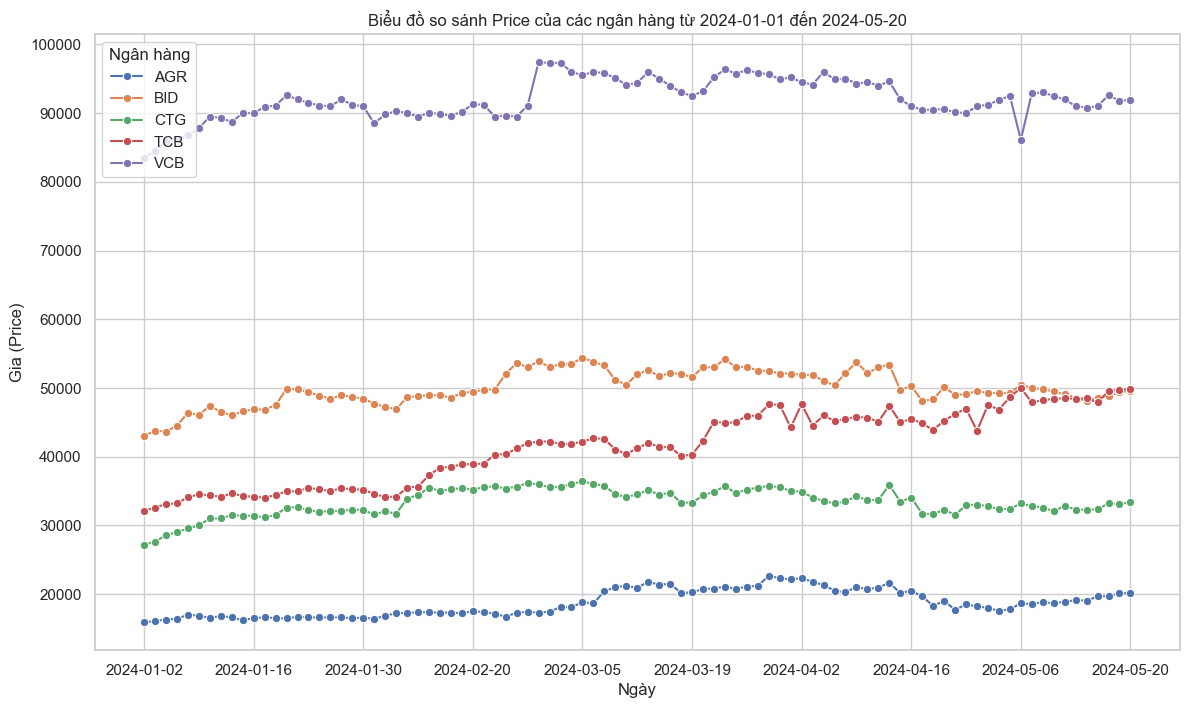

In [22]:
# Đặt khoảng thời gian từ ngày 2023-01-01 đến 2023-12-31
start_date = '2024-01-01'
end_date = '2024-05-20'

# Lọc dữ liệu theo khoảng thời gian
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
filtered_df = df[mask]

# Thiết lập phong cách cho biểu đồ
sns.set(style='whitegrid')

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ biểu đồ giá đóng cửa (Price)
sns.lineplot(data=filtered_df, x='Date', y='Price', hue='XSTC', ax=ax1, marker='o')
ax1.set_ylabel('Gia (Price)')
ax1.set_xlabel('Ngày')
ax1.legend(title='Ngân hàng', loc='upper left')

# Giảm số lượng ticks trên trục x để dễ nhìn hơn
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
ax1.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.title('Biểu đồ so sánh Price của các ngân hàng từ '+start_date +' đến '+end_date)

Các cổ phiếu có xu hướng tăng, có sự chênh lệch khá rõ về giá cổ phiếu của các ngân hàng. Ngân hàng TCB tăng nhiều nhất vượt qua 10000đ

Text(0.5, 1.0, 'Biểu đồ so sánh change của các ngân hàng từ 2024-01-01 đến 2024-05-20')

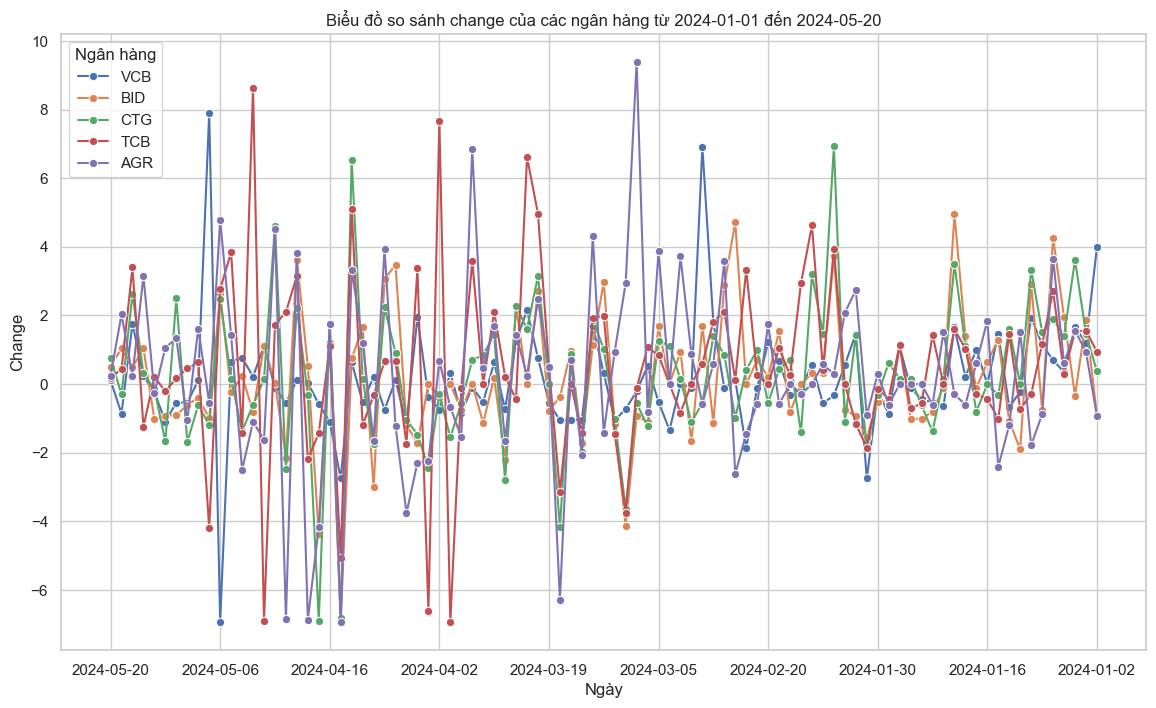

In [ ]:
# Đặt khoảng thời gian từ ngày 2023-01-01 đến 2023-12-31
start_date = '2024-01-01'
end_date = '2024-05-20'

# Lọc dữ liệu theo khoảng thời gian
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
filtered_df = df[mask]

# Thiết lập phong cách cho biểu đồ
sns.set(style='whitegrid')

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ biểu đồ giá đóng cửa (Price)
sns.lineplot(data=filtered_df, x='Date', y='Change %', hue='Ticker Symbol', ax=ax1, marker='o')
ax1.set_ylabel('Change')
ax1.set_xlabel('Ngày')
ax1.legend(title='Ngân hàng', loc='upper left')

# Giảm số lượng ticks trên trục x để dễ nhìn hơn
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
ax1.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.title('Biểu đồ so sánh change của các ngân hàng từ '+start_date +' đến '+end_date)

Ngân hàng có sự thay đổi trung bình lớn nhất: TCB với giá trị trung bình 0.53%
Ngân hàng: AGR với giá trị trung bình 0.29%
Ngân hàng: BID với giá trị trung bình 0.16%
Ngân hàng: CTG với giá trị trung bình 0.25%
Ngân hàng: TCB với giá trị trung bình 0.53%
Ngân hàng: VCB với giá trị trung bình 0.16%


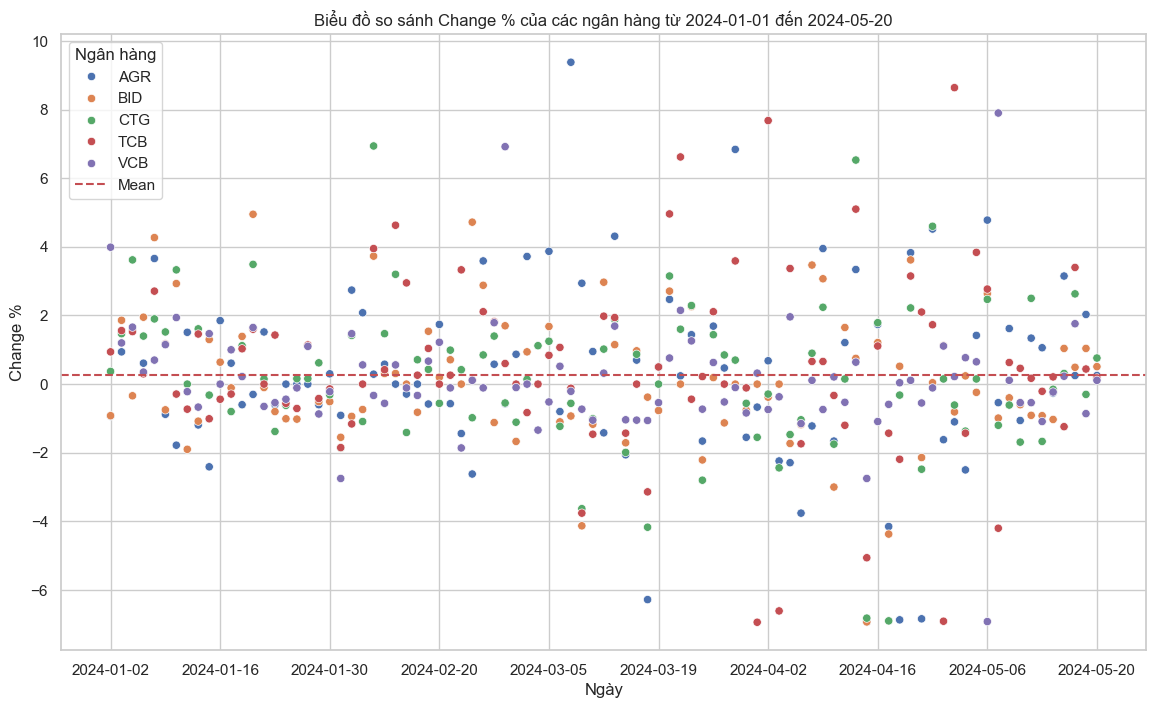

In [30]:
# Thiết lập phong cách cho biểu đồ
sns.set(style='whitegrid')

# Vẽ biểu đồ phân tán
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(data=filtered_df, x='Date', y='Change %', hue='XSTC', palette='deep')

# Thiết lập các nhãn và tiêu đề
scatter_plot.set_ylabel('Change %')
scatter_plot.set_xlabel('Ngày')
scatter_plot.set_title('Biểu đồ so sánh Change % của các ngân hàng từ ' + start_date + ' đến ' + end_date)

# Tính giá trị trung bình của Change % cho từng ngân hàng
average_change = filtered_df.groupby('XSTC')['Change %'].mean()
mean_value = average_change.mean()
# Xác định ngân hàng có giá trị trung bình lớn nhất
max_avg_change_bank = average_change.idxmax()
max_avg_change_value = average_change.max()

print(f"Ngân hàng có sự thay đổi trung bình lớn nhất: {max_avg_change_bank} với giá trị trung bình {max_avg_change_value:.2f}%")
for bank, change_value in average_change.items():
    print(f"Ngân hàng: {bank} với giá trị trung bình {change_value:.2f}%")
# Giảm số lượng ticks trên trục x để dễ nhìn hơn
scatter_plot.xaxis.set_major_locator(plt.MaxNLocator(10))
scatter_plot.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean')

# Hiển thị legend
plt.legend(title='Ngân hàng', loc='upper left')

# Hiển thị biểu đồ
plt.show()




In [28]:
# Tính giá trị trung bình của Change % cho từng ngân hàng
average_change = filtered_df.groupby('XSTC')['Change %'].mean()

# Xác định ngân hàng có giá trị trung bình lớn nhất
max_avg_change_bank = average_change.idxmax()
max_avg_change_value = average_change.max()

print(f"Ngân hàng có sự thay đổi trung bình lớn nhất: {max_avg_change_bank} với giá trị trung bình {max_avg_change_value:.2f}%")


Ngân hàng có sự thay đổi trung bình lớn nhất: TCB với giá trị trung bình 0.53%


Text(0.5, 1.0, 'sự thay đổi (change) của ngân hàng VCB từ 2024-01-01 đến 2024-05-20')

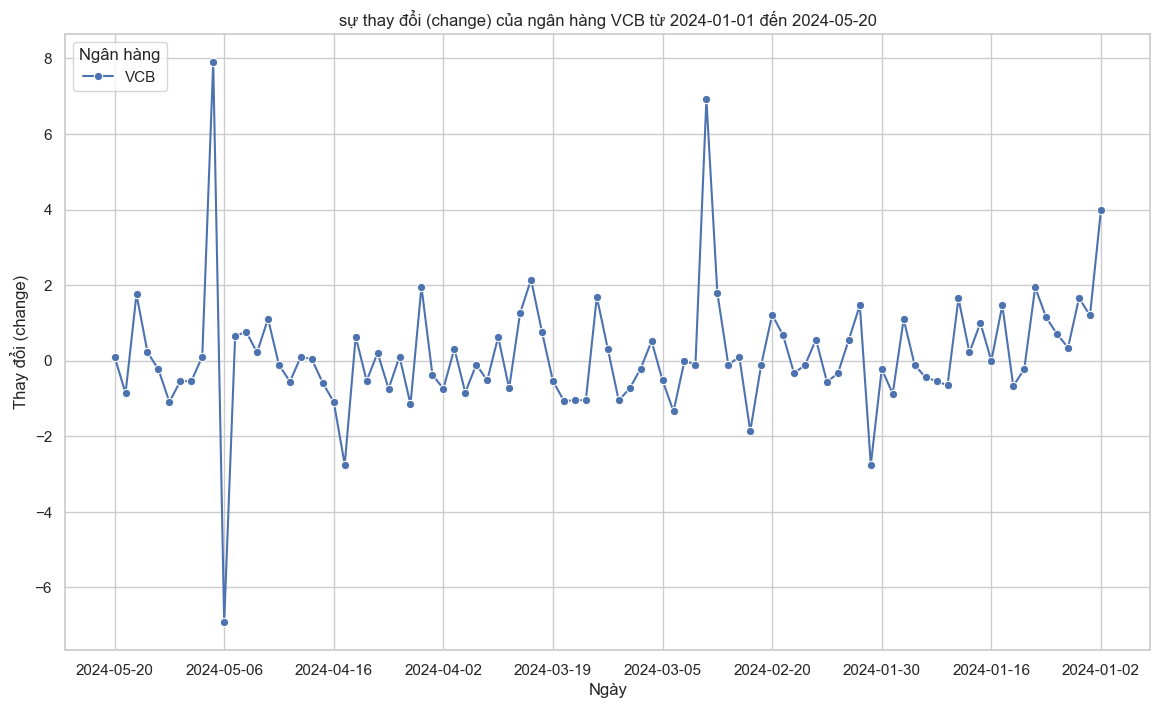

In [ ]:
# Lọc dữ liệu theo khoảng thời gian
filtered_df = df[df['Ticker Symbol'] == 'VCB']
mask = (filtered_df['Date'] >= start_date) & (filtered_df['Date'] <= end_date)
filtered_df = filtered_df[mask]

# Thiết lập phong cách cho biểu đồ
sns.set(style='whitegrid')

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ biểu đồ giá đóng cửa (Price)
sns.lineplot(data=filtered_df, x='Date', y='Change %', hue='Ticker Symbol', ax=ax1, marker='o')
ax1.set_ylabel('Thay đổi (change)')
ax1.set_xlabel('Ngày')
ax1.legend(title='Ngân hàng', loc='upper left')

# Giảm số lượng ticks trên trục x để dễ nhìn hơn
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
ax1.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.title('sự thay đổi (change) của ngân hàng '+filtered_df['Ticker Symbol'].iloc[0]+ ' từ '+start_date +' đến '+ end_date)



# biểu đồ phân tán